In [298]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#기본세팅

In [299]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [300]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [301]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')


In [302]:
# 음수부호 표시하도록 설정
plt.rc("axes", unicode_minus = False)

# warning메시지 무시
import warnings
warnings.filterwarnings('ignore')

Text(0.5, 1.0, '테스트')

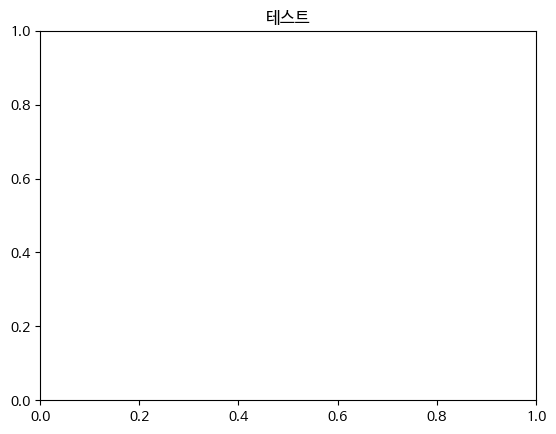

In [303]:
# 한글 출력 잘되는지 테스트
plt.title('테스트')

#데이터 준비

In [304]:
df = pd.read_csv('/content/drive/MyDrive/24-1/데모마/팀플/데이터/SeoulBikeData.csv', encoding ='cp949')


In [305]:
# 날짜 데이터 분리를 위하여 datetime 형식으로 바꾸어 주었다.
df['Date'] = pd.to_datetime(df['Date'],format='%d/%m/%Y')

In [306]:
# 연/월/일 분리해주기
import datetime as dt
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [307]:
# 컬럼명 정리
df.rename(columns={'Temperature(캜)' : 'Temperature',
                   'Dew point temperature(캜)' : 'Dew_point_temperature',
                   'Humidity(%)' : 'Humidity',
                   'Solar Radiation (MJ/m2)' : 'Solar_radiation',
                   'Rainfall(mm)' : 'Rainfall',
                   'Snowfall (cm)' : 'Snowfall',
                   'Wind speed (m/s)' : 'Wind_speed',
                   'Visibility (10m)' : 'Visibility',
                   'Functioning Day' : 'Functioning_day',
                   'Rented Bike Count' : 'Rented_bike_count'}, inplace=True)

In [308]:
df

,Date,Rented_bike_count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_day,Year,Month,Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30


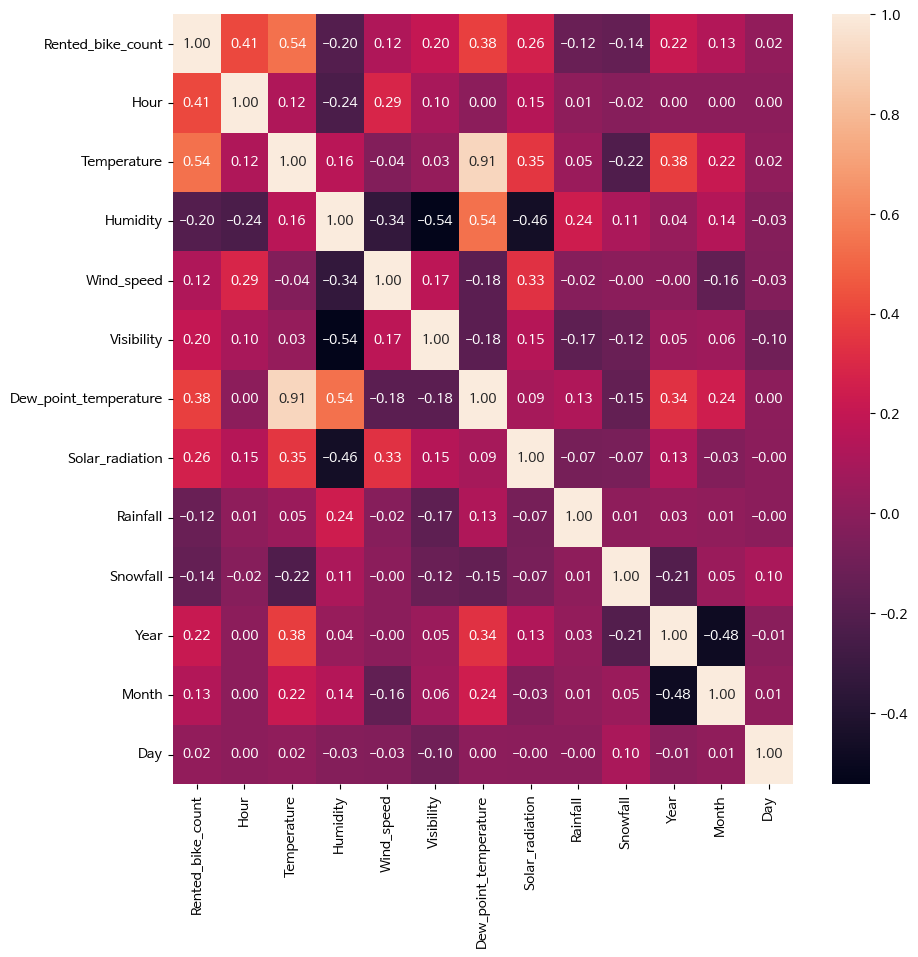

In [309]:
# 연속형 데이터들의 상관관계 분석

corr= df[['Rented_bike_count', 'Hour','Temperature', 'Humidity', 'Wind_speed', 'Visibility', 'Dew_point_temperature',
    'Solar_radiation', 'Rainfall', 'Snowfall','Year', 'Month', 'Day']].corr()


plt.figure(figsize=(10,10))
sns.heatmap(corr,
            annot= True,
            fmt='.2f')

# dew_point_temperature 와 temperature의 상관계수 값이 0.91임으로 다중공선성 문제 발생 가능
# dew_point_temperature 독립변수에서 제외하였다.
df.drop('Dew_point_temperature', axis=1, inplace=True)

In [310]:
df.dtypes

Date                 datetime64[ns]
Rented_bike_count             int64
Hour                          int64
Temperature                 float64
Humidity                      int64
Wind_speed                  float64
Visibility                    int64
Solar_radiation             float64
Rainfall                    float64
Snowfall                    float64
Seasons                      object
Holiday                      object
Functioning_day              object
Year                          int32
Month                         int32
Day                           int32
dtype: object

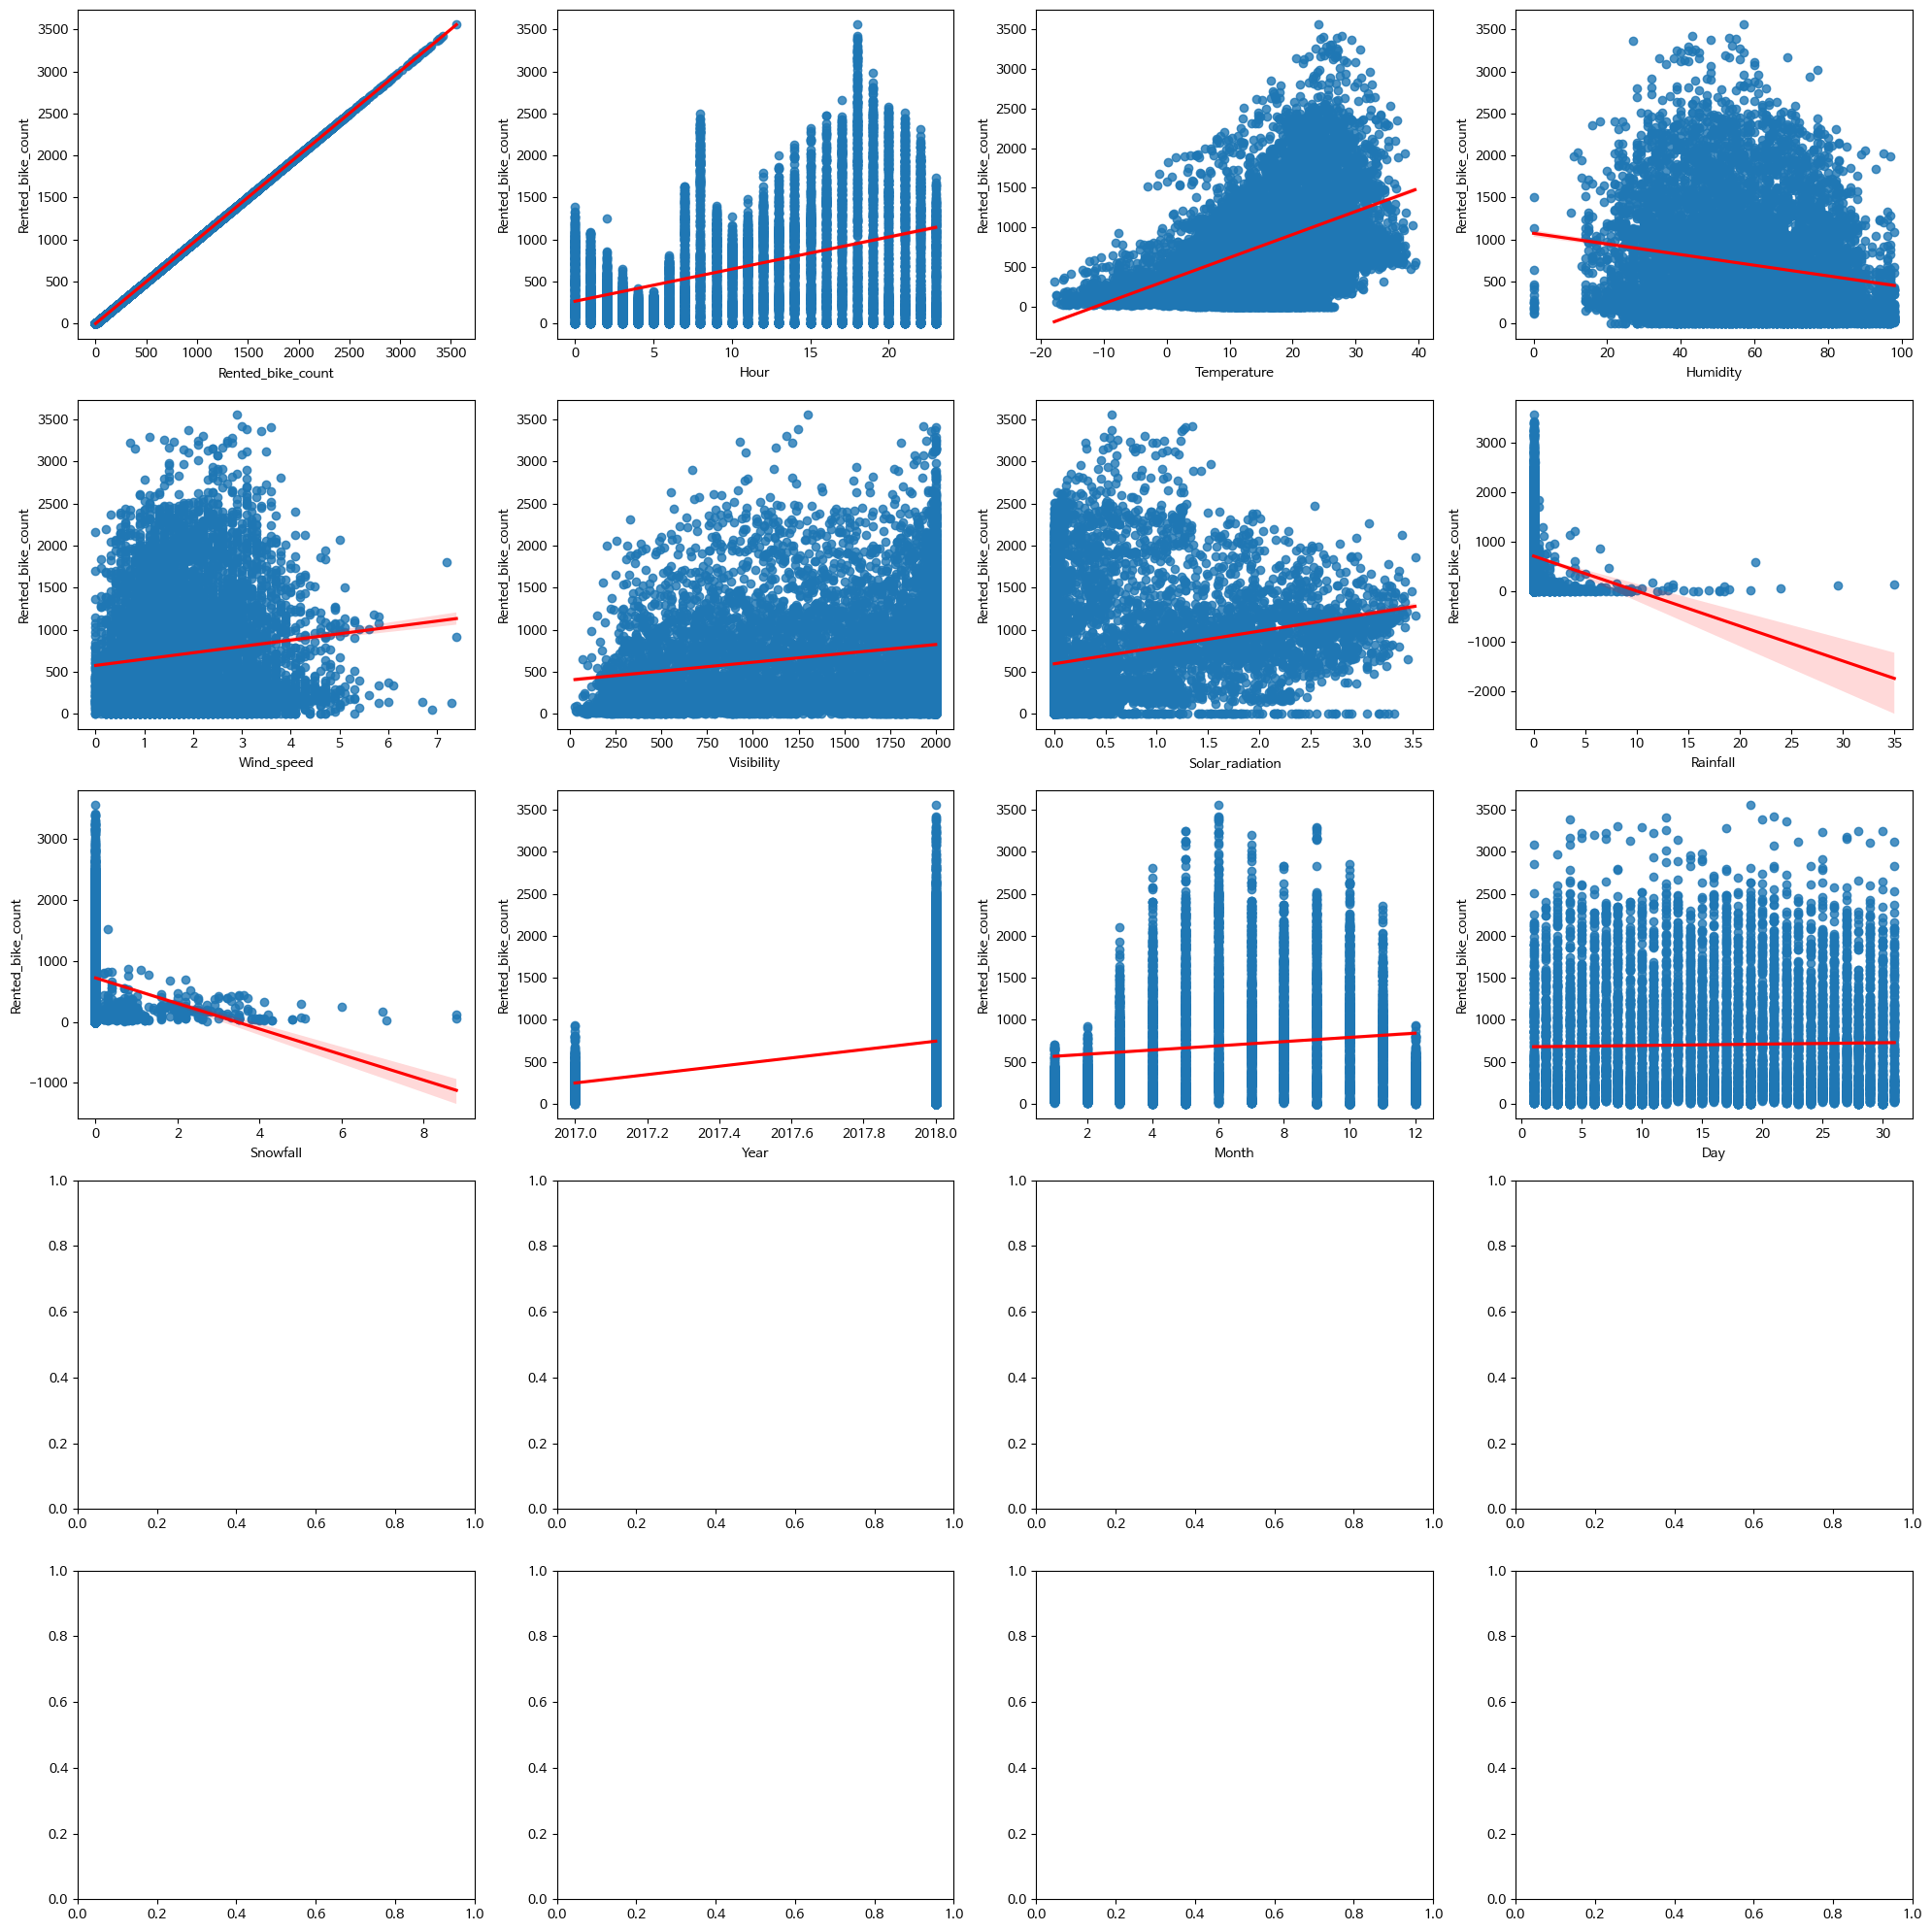

In [311]:
# 선형관계를 파악하기 위해 연속형 변수들과, 자전거 이용객 간의 regplot을 그려 상관성을 파악하였다.
int_float_col = df.select_dtypes(include=['int', 'float'])
int_float_cols = int_float_col.columns

fig, ax = plt.subplots(5, 4, figsize=(20, 20))

for i, col in enumerate(int_float_cols):
    sns.regplot(x=df[col], y=df['Rented_bike_count'], ax=ax[i//4, i%4], line_kws={'color': 'red'})
    ax[i//4, i%4].set_xlabel(col)
    ax[i//4, i%4].set_ylabel('Rented_bike_count')

plt.tight_layout()
plt.show()

In [312]:
df.select_dtypes(include='object')

,Seasons,Holiday,Functioning_day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes
...,...,...,...
8755,Autumn,No Holiday,Yes
8756,Autumn,No Holiday,Yes
8757,Autumn,No Holiday,Yes
8758,Autumn,No Holiday,Yes


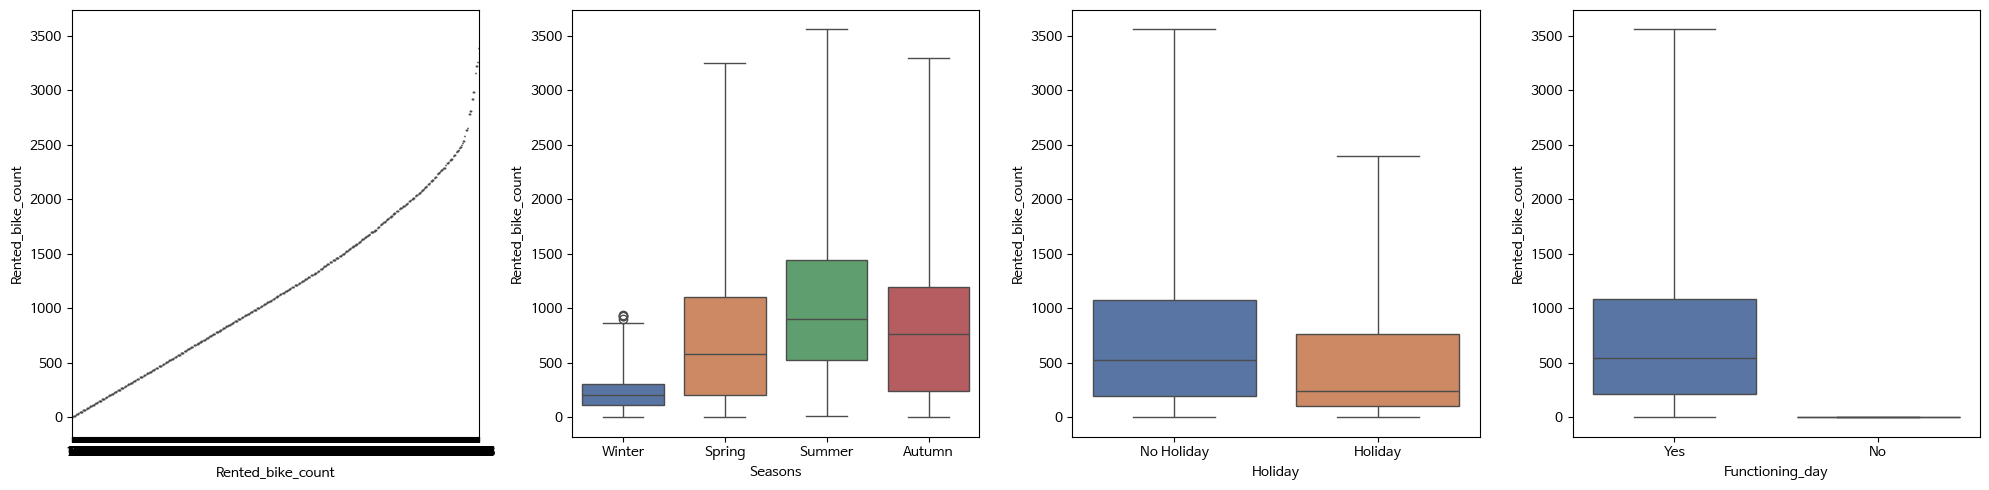

In [313]:
# 명목형 변수들은 총 3개로, 이 또한, 자전거 탑승인원과 상관성을 파악하기 위해 boxplot을 그렸다.
object_col = df[['Rented_bike_count', 'Seasons', 'Holiday', 'Functioning_day']]
object_cols = object_col.columns

fig, ax = plt.subplots(1, 4, figsize=(20, 5))

for i, col in enumerate(object_cols):
    sns.boxplot(x=df[col], y=df['Rented_bike_count'], ax=ax[i],
                palette='deep', whis=3.0)
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Rented_bike_count')

plt.tight_layout()
plt.show()

# 피처엔지니어링

<Axes: title={'center': '파생 변수들의 상관계수값'}>

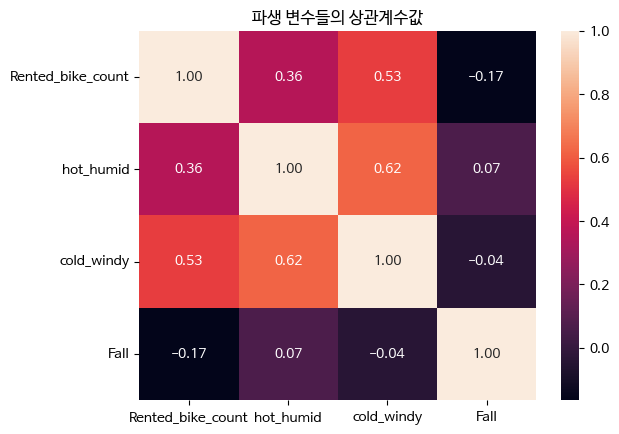

In [314]:
# 변수 사이의 관련성을 고려하여 새로운 파생변수들을 만들어 보았다.

# 덥고 습한 날씨엔 사람들이 타지 않을것이다
df['hot_humid'] = df['Temperature'] * df['Humidity']

# 춥고 바람부는날엔 사람들이 타지 않을 것이다.
df['cold_windy'] = df['Temperature'] * df['Wind_speed']

# 눈오는날 + 비오는날 합쳐서 Fall이라는 변수를 추가했다.
df['Fall'] = df['Rainfall'] + df['Snowfall']

corr =df[['Rented_bike_count', 'hot_humid', 'cold_windy', 'Fall']].corr()

plt.title('파생 변수들의 상관계수값')
sns.heatmap(corr,annot=True, fmt='.2f')

# 범주형 변수들 인코딩하기

In [315]:
df.drop('Date',axis=1,inplace=True)

In [316]:
df2=pd.get_dummies(df)

In [317]:
df2.shape

(8760, 23)

# 모델링하기

In [318]:
# test_X는 2018년 6월의 변수 23개를 지정하였다.
# 2018_6월의 이용객들의 수를  test_y로 설정하였다.

test_x = df2.loc[(df2['Year'] == 2018) & (df2['Month'] == 6)]

test_y = test_x['Rented_bike_count'] # 이용객의 수
test_X = test_x.drop('Rented_bike_count',axis=1)

In [319]:
train_X = df2.drop(test_x.index)
train_X

train_y = train_X['Rented_bike_count']
train_X.drop('Rented_bike_count', axis=1, inplace=True)

In [320]:
print(train_X.shape)
print(test_X.shape)

print(train_y.shape)
print(test_y.shape)

(8040, 22)
(720, 22)
(8040,)
(720,)


In [321]:
from sklearn.model_selection import train_test_split

# 훈련 데이터를 훈련 세트와 검증 세트로 분할하였다.
train_input, val_input, train_target, val_target = train_test_split(train_X, train_y,random_state=42)

In [322]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import cross_val_score


##선형회귀

In [323]:
lr= LinearRegression()
lr.fit(train_input, train_target)
print(lr.score(train_input, train_target))
print(lr.score(val_input, val_target))



0.5809706488853714
0.5630549509567238


## 랜덤포레스트

In [324]:
# RandomForest를 통한 점수

rf = RandomForestRegressor()
rf.fit(train_input, train_target)

print('train_score:', rf.score(train_input,train_target))
print('valid_score:', rf.score(val_input,val_target))

mse = mean_squared_error(val_target, rf.predict(val_input))
print('rmse :' ,np.sqrt(mse))

train_score: 0.9823859507514199
valid_score: 0.8720067443087971
rmse : 215.74282298526583


## LGBM 회귀

In [325]:
# LGBM회귀
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor()

lgbm.fit(train_input, train_target)
print('train_score:', lgbm.score(train_input,train_target))
print('valid_score:', lgbm.score(val_input,val_target))

mse = mean_squared_error(val_target, lgbm.predict(val_input))
print('rmse :' ,np.sqrt(mse))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001652 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1608
[LightGBM] [Info] Number of data points in the train set: 6030, number of used features: 22
[LightGBM] [Info] Start training from score 659.618408
train_score: 0.9466066030669761
valid_score: 0.8847106427931669
rmse : 204.75637065734


##Xboost 회귀



In [326]:
from xgboost import XGBRegressor
xgb= XGBRegressor()

xgb.fit(train_input, train_target)
print('train_score:', xgb.score(train_input,train_target))
print('valid_score:', xgb.score(val_input,val_target))

mse = mean_squared_error(val_target, xgb.predict(val_input))
print('rmse :' ,np.sqrt(mse))

train_score: 0.9825424682417307
valid_score: 0.8802964120451211
rmse : 208.6394350617069


# LGBM회귀와 랜덤서치를 통해 최적 하이퍼파리미터 찾기



*   RandomForest
  - train_score: 0.9825394086693119
  - valid_score: 0.8725087393897193
  - rmse : 215.31933100057998

*   LGBMRegressor
  - train_score: 0.9466066030669761
  - valid_score: 0.8847106427931669
  - rmse : 204.75637065734

* XboostRegressor
  - train_score: 0.9825424682417307
  - valid_score: 0.8802964120451211
  - rmse : 208.6394350617069


**-> 오차값(RMSE)이 가장 작은 LGBMRegressor로 모델 결정 **

In [297]:
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor()

param_dist = {
    'num_leaves': sp_randint(6, 50), ## 각 트리의 최대 리프 노드 개수 (6에서 49까지의 무작위 정수 선택)
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],  # 학습률 (사용할 수 있는 고정된 값들)
    'n_estimators': sp_randint(50, 500), # 부스팅 트리의 개수 (50에서 499까지의 무작위 정수 선택)
    'max_depth': sp_randint(3, 15),  # 각 트리의 최대 깊이 (3에서 14까지의 무작위 정수 선택)
    'min_child_samples': sp_randint(2, 50), # 리프 노드에 필요한 최소 샘플 수 (2에서 49까지의 무작위 정수 선택)
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0], #  # 각 트리를 학습시킬 때 사용할 데이터 샘플링 비율
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0], #  각 트리를 학습시킬 때 사용할 피처 샘플링 비율
    'reg_alpha': [0, 0.1, 0.5, 1.0], # L1 정규화 항의 계수
    'reg_lambda': [0, 0.1, 0.5, 1.0] # L2 정규화 항의 계수
}



# 랜덤 서치 수행 (소요시간 5분)
random_search_lgbm = RandomizedSearchCV(estimator=lgbm, param_distributions=param_dist, n_iter=100, cv=5)
random_search_lgbm.fit(train_X,train_y)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002308 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1583
[LightGBM] [Info] Number of data points in the train set: 6432, number of used features: 21
[LightGBM] [Info] Start training from score 764.777830
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

Exception ignored on calling ctypes callback function: <function _log_callback at 0x7f19fa467520>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py", line 203, in _log_callback
    def _log_callback(msg: bytes) -> None:
KeyboardInterrupt: 


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_iter=100,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f1a03e94850>,
                                        'min_child_samples': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f1a003c40d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f1a0044f190>,
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f1a06d67d30>,
                                        'reg_alpha': [0, 0.1, 0.5, 1.0],
                                        'reg_lambda': [0, 0.1, 0.5, 1.0],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]})

In [327]:
# LGBMRegressor와 Random Search를 통해 찾아낸 최적 파라미터
random_search_lgbm.best_params_

{'colsample_bytree': 0.6,
 'learning_rate': 0.05,
 'max_depth': 11,
 'min_child_samples': 5,
 'n_estimators': 305,
 'num_leaves': 33,
 'reg_alpha': 1.0,
 'reg_lambda': 0.1,
 'subsample': 0.7}

In [330]:
print('test score :',random_search_lgbm.score(test_X, test_y))
mse = mean_squared_error(test_y, random_search_lgbm.predict(test_X))
print('rmse :' ,np.sqrt(mse))

test score : 0.7706477667363971
rmse : 368.04783997787956


77% R2 score가 나왔음.